<a href="https://colab.research.google.com/github/MLJCUnito/ProjectX2020/blob/master/HowToTackleAMLCompetition/Lecture7%7CAdvancedFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-bio geopandas libpysal splot pygeos

     |████████████████████████████████| 8.4MB 2.7MB/s 
     |████████████████████████████████| 972kB 46.6MB/s 
     |████████████████████████████████| 2.4MB 20.8MB/s 
     |████████████████████████████████| 1.6MB 34.4MB/s 
     |████████████████████████████████| 10.9MB 43.9MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 266kB 33.7MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 235kB 48.8MB/s 
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp36-cp36m-linux_x86_64.whl size=1453814 sha256=4d7be0d894aeb820651d2cde06285a4be62644a712bfe6166b99a8906b4ef271
  Stored in directory: /root/.cache/pip/wheels/1b/a9/f8/a46766b84d16bc409df4330f3a74dde61c5cf8400fed003a70
  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379082 sha256=f0254caa3ca873aa2bbd94b70212beef6d45dfc8a188b4556f06fc2baa44d598
  Stor

# K-Nearest-Neighbors (KNN)

Intro with sklearn and a quick example

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets, neighbors
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_decision_regions

In [4]:
!wget https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/Data/Lecture7/data_ushape.csv

--2020-08-30 20:26:20--  https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/Data/Lecture7/data_ushape.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2880 (2.8K) [text/plain]
Saving to: ‘data_ushape.csv’

data_ushape.csv     100%[===================>]   2.81K  --.-KB/s    in 0s      

2020-08-30 20:26:20 (36.4 MB/s) - ‘data_ushape.csv’ saved [2880/2880]



In [11]:
data = pd.read_csv("data_ushape.csv")
data.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [24]:
X = data[["X","Y"]].values
y = data["class"].astype(int).values

In [19]:
k_ex = 5
clf = neighbors.KNeighborsClassifier(n_neighbors=k_ex)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

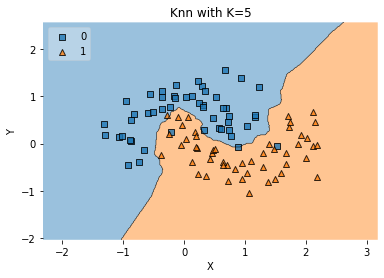

In [20]:
# Plotting decision region
plot_decision_regions(X, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Knn with K="+ str(k_ex))
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# creating a list of k for KNN
k_list = list(range(1,50,2))
# creating a list of cv scores 
cv_scores = []

# perform 10-fold cross validation 
for k in k_list: 
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
  cv_scores.append(scores.mean())


<Figure size 432x288 with 0 Axes>

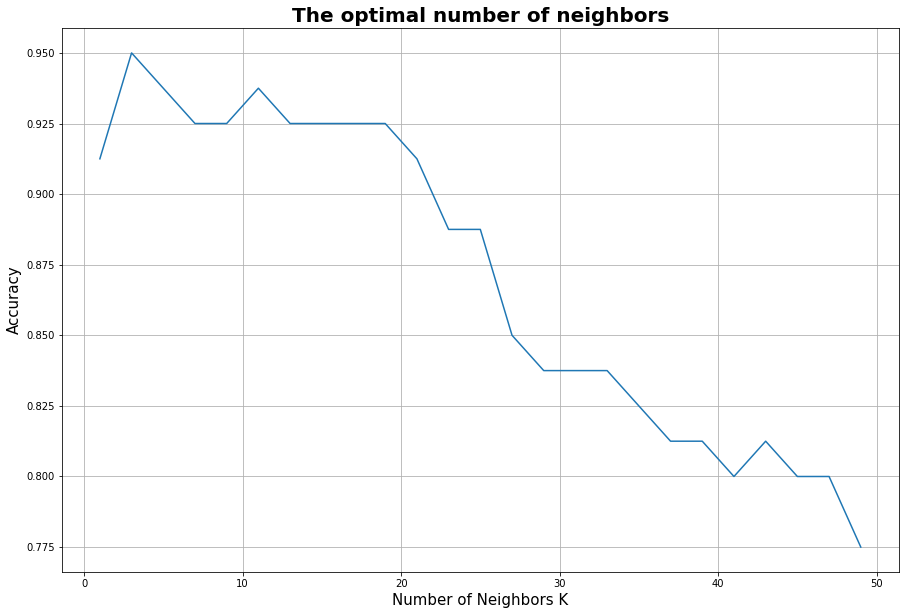

In [31]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.plot(k_list, cv_scores)

In [34]:
best_k = k_list[cv_scores.index(max(cv_scores))]
worst_k = k_list[cv_scores.index(min(cv_scores))]
print("Optimal number of neighbors: " + str(best_k))

Optimal number of neighbors: 3


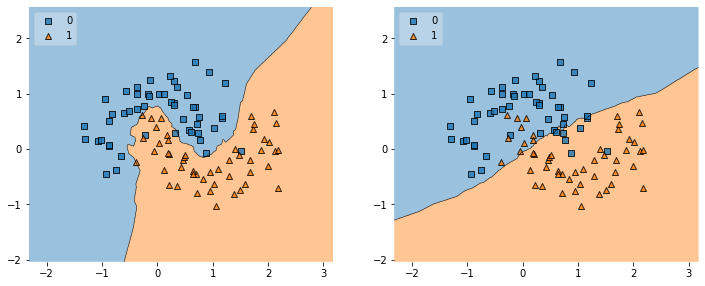

In [38]:
figure, axis = plt.subplots(1,2, 
                            subplot_kw = dict(aspect = "equal"),
                            figsize=(12,8))

best_clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
#Use all your data now !! 
best_clf.fit(X, y)

worst_clf = neighbors.KNeighborsClassifier(n_neighbors=worst_k) 
worst_clf.fit(X,y)

# Plotting decision region
plot_decision_regions(X, y, clf=best_clf, legend=2, ax = axis[0])

plot_decision_regions(X, y, clf=worst_clf, legend=2, ax = axis[1])

### A Use Case (KNN in Spatial Weights Matrices and Geo-Data)

In [3]:
!wget https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson

--2020-08-30 14:56:19--  https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37928373 (36M) [text/plain]
Saving to: ‘limits_IT_municipalities.geojson’

limits_IT_municipal 100%[===================>]  36.17M  54.5MB/s    in 0.7s    

2020-08-30 14:56:21 (54.5 MB/s) - ‘limits_IT_municipalities.geojson’ saved [37928373/37928373]



In [4]:
import geopandas as gpd 
import matplotlib.pyplot as plt 
import libpysal.weights as lp 
from splot.libpysal import plot_spatial_weights

In [5]:
municip = gpd.read_file("limits_IT_municipalities.geojson")
piemonte_municip = municip[municip.reg_name == "Piemonte"]
torino_prov = piemonte_municip[piemonte_municip.prov_name == "Torino"]
torino_prov.head()

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
0,Agliè,130,1010810010,Torino,001,1,TO,Piemonte,01,1,1,A074,001001,1001,None,None,None,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,131,1010810020,Torino,001,1,TO,Piemonte,01,1,2,A109,001002,1002,None,None,None,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,132,1010810030,Torino,001,1,TO,Piemonte,01,1,3,A117,001003,1003,None,None,None,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,133,1010810040,Torino,001,1,TO,Piemonte,01,1,4,A157,001004,1004,None,None,None,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,135,1010810060,Torino,001,1,TO,Piemonte,01,1,6,A218,001006,1006,None,None,None,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."


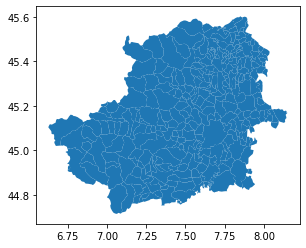

In [6]:
torino_prov.plot()

In [7]:
torino_prov.shape

(312, 18)

In [8]:
import libpysal
libpysal.__version__

'4.3.0'

### Constructing Adjacency Matrix

In [9]:
w_queen = lp.Queen.from_dataframe(torino_prov, geom_col= "geometry")

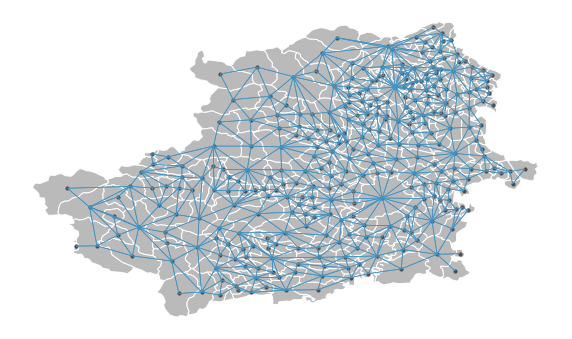

In [11]:
plot_spatial_weights(w_queen, torino_prov)
plt.show()

In [10]:
w_queen.neighbors[4]

[224, 278, 296, 11, 60]

In [26]:
torino_prov[torino_prov.name == "Torino"]

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
267,Torino,401,1010812620,Torino,001,1,TO,Piemonte,01,1,272,L219,001272,1272,None,None,None,"MULTIPOLYGON (((7.66882 45.13802, 7.69016 45.1..."


In [27]:
torino_prov.loc[[267]]

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
267,Torino,401,1010812620,Torino,001,1,TO,Piemonte,01,1,272,L219,001272,1272,None,None,None,"MULTIPOLYGON (((7.66882 45.13802, 7.69016 45.1..."


In [28]:
torino_prov.loc[w_queen.neighbors[267]]

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
160,Nichelino,293,1010811620,Torino,001,1,TO,Piemonte,01,1,164,F889,001164,1164,None,None,None,"MULTIPOLYGON (((7.62415 45.00813, 7.62902 45.0..."
260,Settimo Torinese,394,1010812550,Torino,001,1,TO,Piemonte,01,1,265,I703,001265,1265,None,None,None,"MULTIPOLYGON (((7.77262 45.12362, 7.77017 45.1..."
167,Orbassano,300,1010811680,Torino,001,1,TO,Piemonte,01,1,171,G087,001171,1171,None,None,None,"MULTIPOLYGON (((7.57622 45.04024, 7.57985 45.0..."
16,Baldissero Torinese,147,1010810180,Torino,001,1,TO,Piemonte,01,1,18,A591,001018,1018,None,None,None,"MULTIPOLYGON (((7.78759 45.09177, 7.78938 45.0..."
178,Pecetto Torinese,312,1010811790,Torino,001,1,TO,Piemonte,01,1,183,G398,001183,1183,None,None,None,"MULTIPOLYGON (((7.74806 45.03629, 7.74882 45.0..."
244,San Mauro Torinese,377,1010812390,Torino,001,1,TO,Piemonte,01,1,249,I030,001249,1249,None,None,None,"MULTIPOLYGON (((7.74220 45.11812, 7.74962 45.1..."
309,Mappano,8269,1010811415,Torino,001,1,TO,Piemonte,01,1,316,M316,001316,1316,None,None,None,"MULTIPOLYGON (((7.72255 45.14794, 7.72867 45.1..."
22,Beinasco,153,1010810240,Torino,001,1,TO,Piemonte,01,1,24,A734,001024,1024,None,None,None,"MULTIPOLYGON (((7.59568 45.03108, 7.59774 45.0..."
118,Grugliasco,249,1010811180,Torino,001,1,TO,Piemonte,01,1,120,E216,001120,1120,None,None,None,"MULTIPOLYGON (((7.55885 45.07001, 7.56487 45.0..."
88,Collegno,219,1010810880,Torino,001,1,TO,Piemonte,01,1,90,C860,001090,1090,None,None,None,"MULTIPOLYGON (((7.60746 45.12016, 7.61685 45.1..."


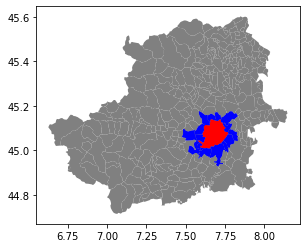

In [29]:
figure, axis = plt.subplots(1,1)
torino_prov.plot(color = "grey", ax = axis)
torino_prov.loc[[267]].plot(color = "r", ax = axis)
torino_prov.loc[w_queen.neighbors[267]].plot(color = "b", ax = axis)

In [ ]:
w_knn5 = lp.KNN.from_dataframe(torino_prov, k = 5)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff021214208>)

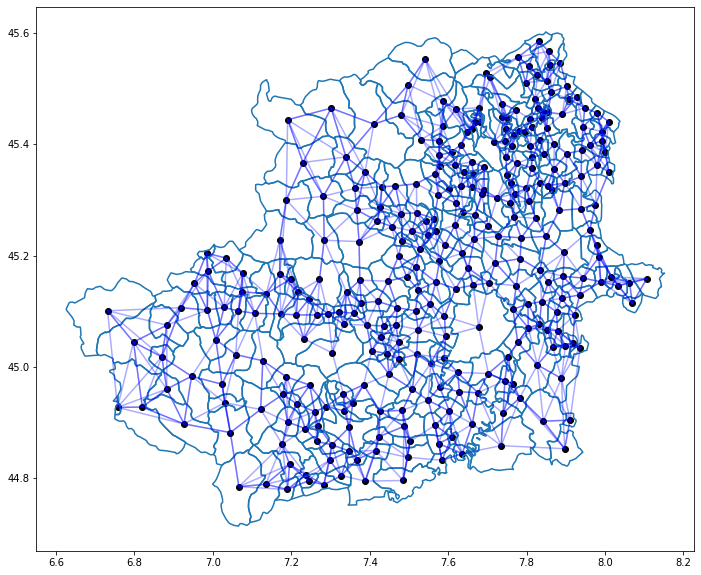

In [ ]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
torino_prov.boundary.plot(ax = axis)
w_knn5.plot(torino_prov, edge_kws= dict(color = "blue", alpha = .33), ax = axis)

In [ ]:
len(w_knn5.asymmetries)

652

In [ ]:
w_knn5.nonzero

1560

In [ ]:
w_knn3 = lp.KNN.from_dataframe(torino_prov, k = 3)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff023c258d0>)

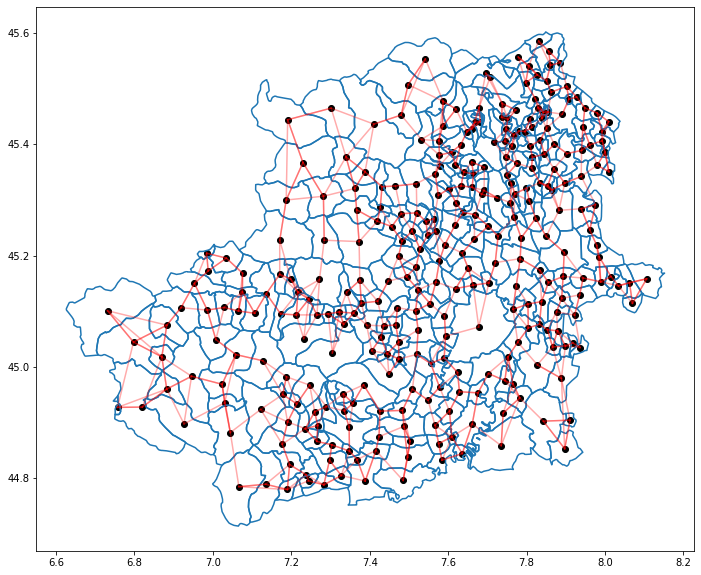

In [ ]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
torino_prov.boundary.plot(ax = axis)
w_knn3.plot(torino_prov, edge_kws= dict(color = "red", alpha = .33), ax = axis)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff01dc4d320>)

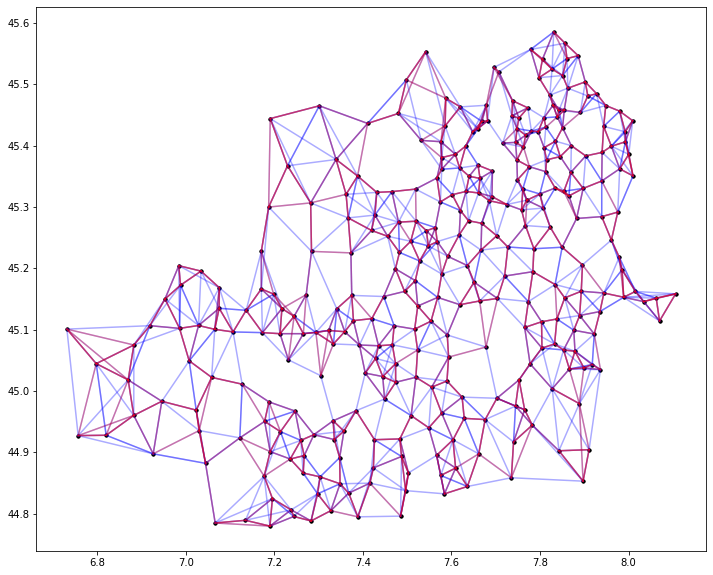

In [ ]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
#torino_prov.boundary.plot(ax = axis)
w_knn5.plot(torino_prov, edge_kws= dict(color = "blue", alpha = .33),
            node_kws = dict(marker = "."), ax = axis)
w_knn3.plot(torino_prov, edge_kws=dict(color = "red", alpha = .33 ), 
            node_kws = dict(marker ="."), ax =axis)

Note that every link in the KNN-3 is also contained in the KNN-5. This is because every observation that is one of the top two closest observations to another observation will always be in the closest five as well.

(array([ 14.,  74., 143.,  51.,  19.,   8.,   1.,   1.,   0.,   1.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

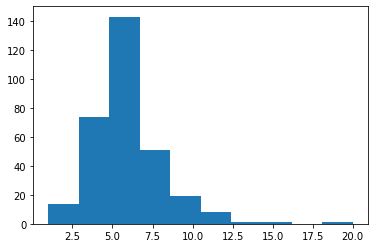

In [ ]:
plt.hist(w_queen.sparse.sum(axis = 1))

(array([  0.,   0.,   0.,   0.,   0., 312.,   0.,   0.,   0.,   0.]),
 array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5]),
 <a list of 10 Patch objects>)

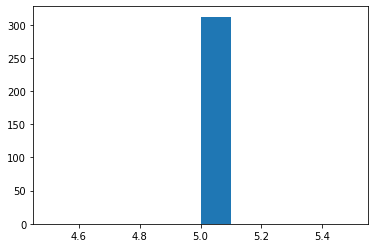

In [ ]:
plt.hist(w_knn5.sparse.sum(axis = 1))

In [ ]:
w_knn5_symmetric = w_knn5.symmetrize()

In [ ]:
w_knn5_symmetric.asymmetries

[]

(array([107.,   0., 109.,   0.,   0.,  75.,   0.,  17.,   0.,   4.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 10 Patch objects>)

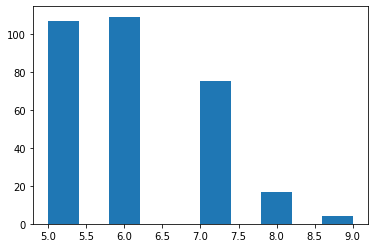

In [ ]:
plt.hist(w_knn5_symmetric.sparse.sum(axis = 1))

### Kernel Weights (Bonus)

Kernel weights reflect spatial relationships that decay with distance. 



In [15]:
triangular = lp.Kernel.from_dataframe(torino_prov)

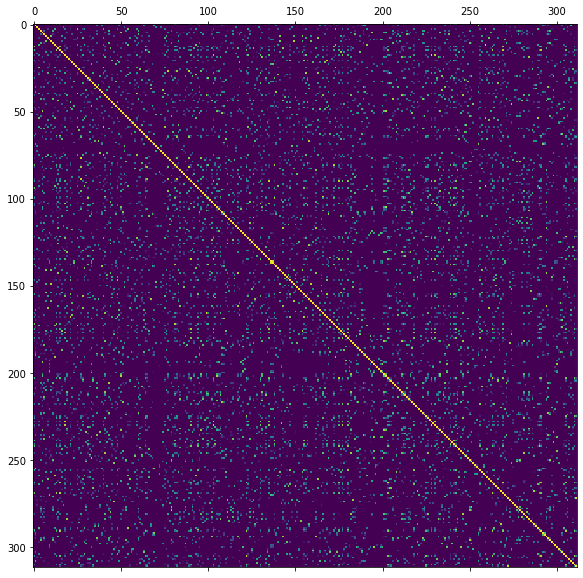

In [20]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
axis.matshow(triangular.sparse.toarray())

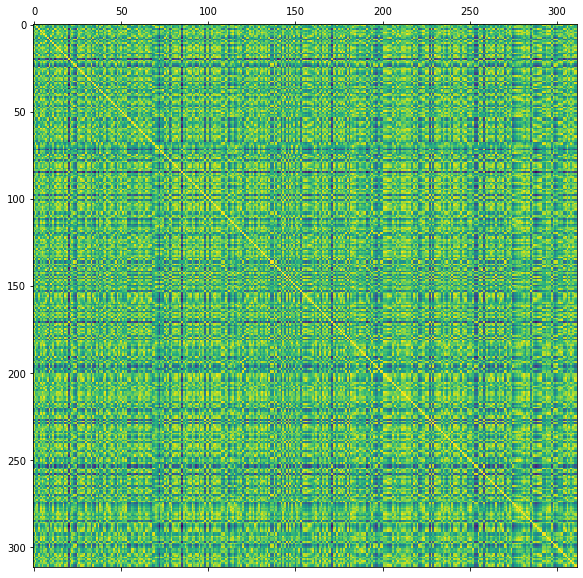

In [22]:
triangular_10 = lp.Kernel.from_dataframe(torino_prov, bandwidth = 10)
figure, axis = plt.subplots(1,1, figsize = (12, 10))
axis.matshow(triangular_10.sparse.toarray())

In [23]:
triangular.bandwidth[0]

array([0.1534496])

In [24]:
triangular_10.bandwidth[0]

array([10.])

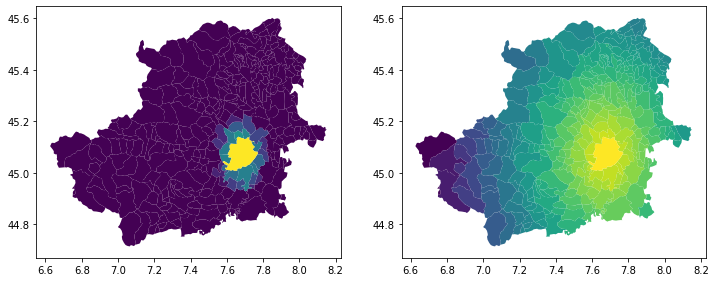

In [30]:
figure, axis = plt.subplots(1,2, 
                            subplot_kw = dict(aspect = "equal"),
                            figsize=(12,8))

flat_weights = triangular.sparse[267].toarray().flatten()
flat_weights_10 = triangular_10.sparse[267].toarray().flatten()

torino_prov.assign(w = flat_weights).plot("w", ax = axis[0])
torino_prov.assign(w = flat_weights_10).plot("w", ax = axis[1])

We can also adjust the function used to generate the kernel. 

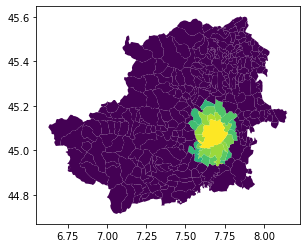

In [32]:
gaussian = lp.Kernel.from_dataframe(torino_prov, function = "gaussian")

flat_weights_g = gaussian.sparse[267].toarray().flatten()
torino_prov.assign(w = flat_weights_g).plot("w")


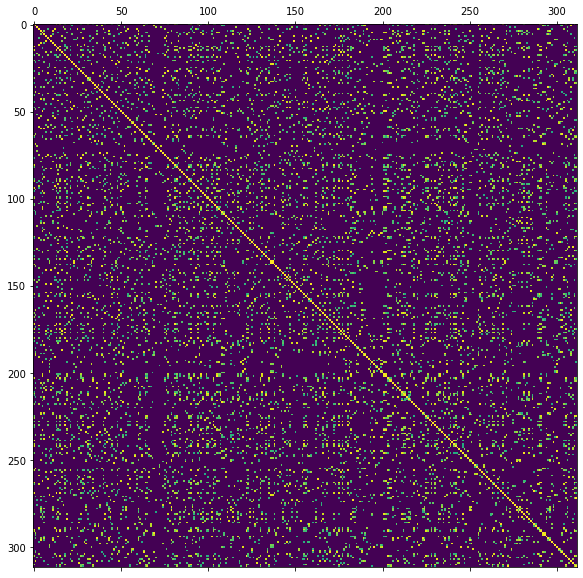

In [33]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
axis.matshow(gaussian.sparse.toarray())

Adaptive bandwidth allow for kernels to adjust dynamically

In [34]:
gaussian_adaptive = lp.Kernel.from_dataframe(torino_prov, function = "gaussian", k = 40, fixed = False)

In [35]:
gaussian_adaptive.bandwidth[0]

array([0.11372278])

In [36]:
gaussian_adaptive.bandwidth[1]

array([0.1783534])

(array([ 80., 110.,  60.,  35.,  12.,   7.,   4.,   1.,   1.,   2.]),
 array([0.10910673, 0.14879013, 0.18847353, 0.22815693, 0.26784033,
        0.30752374, 0.34720714, 0.38689054, 0.42657394, 0.46625734,
        0.50594074]),
 <a list of 10 Patch objects>)

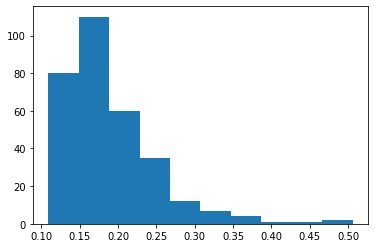

In [37]:
plt.hist(gaussian_adaptive.bandwidth.flatten())

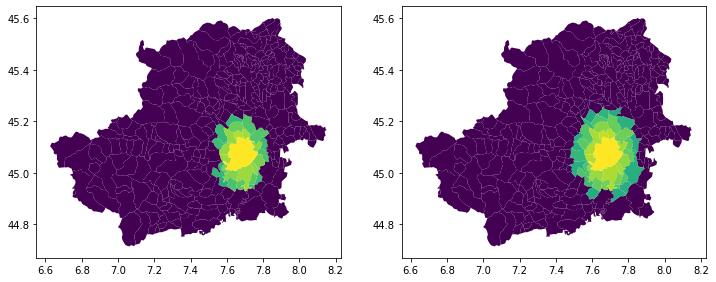

In [39]:
figure, axis = plt.subplots(1,2, subplot_kw= dict(aspect = "equal"), figsize = (12, 8))

weights_gaussian_adaptive  = gaussian_adaptive.sparse[267].toarray().flatten()

torino_prov.assign(w = flat_weights_g).plot("w", ax = axis[0])
torino_prov.assign(w = weights_gaussian_adaptive).plot("w", ax = axis[1])

### A Non-Euclidean Distance: Bray-Curtis

Definition, a few lines on non-euclidean distances

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd

sample_ids = ['A', 'B', 'C']
feature_ids = ['OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5']
data = np.array([[1, 0, 0],
                 [3, 2, 0],
                 [0, 0, 6],
                 [1, 4, 2],
                 [0, 4, 1]])

table1 = pd.DataFrame(data, index=feature_ids, columns=sample_ids)
table1

,A,B,C
OTU1,1,0,0
OTU2,3,2,0
OTU3,0,0,6
OTU4,1,4,2
OTU5,0,4,1


In [40]:
#from scipy.spatial.distance import braycurtis
from skbio.stats.distance import DistanceMatrix

In [41]:
def bray_curtis_distance(table, sample1_id, sample2_id):
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return numerator / denominator

In [42]:
def df_to_distances(table, pairwise_distance_fn):
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = np.zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

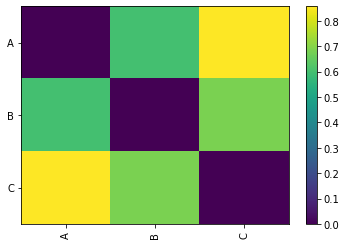

In [43]:
df_to_distances(table1, bray_curtis_distance)

## Matrix Factorization Methods: NMF, SVD, PCA

## Feature Interactions

## Manifold Learning Methods: t-SNE, UMAP

# References & Additional Material

* https://www.kaggle.com/deepthiar/toydatasets : KNN Data, a nice Kaggle repo

* http://rasbt.github.io/mlxtend/ : MLxtend library

* https://splot.readthedocs.io/en/stable/users/tutorials/weights.html : PySal Docs

* http://readiab.org/ Applied Bioinformatics in Python

* https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf : t-SNE Paper

* https://lvdmaaten.github.io/tsne/ : t-SNE FAQ

